## PCA (Principal Component Analysis):Analyzing Attributes of Patients

## What is PCA (Principal Component Analysis)?

PCA is a technique used to simplify large datasets by keeping only the most important information. It finds new axes (called principal components) that capture the most variation in the data and uses them to create a smaller, easier-to-work-with version of the data. Think of it like turning a messy, high-dimensional picture into a clear snapshot that still shows the main idea.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder

## Implementation of the PCA Algorithm

Here I will implement the PCA algorithm using the **PCA** Class

In [2]:
class PCA:
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.components_ = None
        self.mean_ = None
        self.explained_variance_ratio_ = None
        
    def fit(self, X):
        # Center the data
        self.mean_ = np.mean(X, axis=0)
        X_centered = X - self.mean_
        
        # Compute SVD
        U, sigma, Vt = np.linalg.svd(X_centered, full_matrices=False)
        
        # Store components (eigenvectors)
        self.components_ = Vt
        
        # Compute explained variance ratio
        explained_variance = (sigma ** 2) / (X.shape[0] - 1)
        total_variance = np.sum(explained_variance)
        self.explained_variance_ratio_ = explained_variance / total_variance
        
        return self
    
    def transform(self, X):
        # Center the data using mean from fit
        X_centered = X - self.mean_
        
        # Project data onto principal components
        if self.n_components is not None:
            return np.dot(X_centered, self.components_[:self.n_components].T)
        return np.dot(X_centered, self.components_.T)
    
    def fit_transform(self, X):
        return self.fit(X).transform(X)

##  Load and Preprocess the Hearts Dataset
We will use the `hearts` dataset and classify a patient as either **Has Heart Disease**(label=1) or **Does not have Heart Disease**(label=0)

We'll also drop any rows with missing values.

## Normalize and Prepare Features
Logistic regression works best when the input features are on a similar scale. We'll normalize the features to have mean 0 and standard deviation 1.

In [ ]:
# Load and process the heart dataset 
data = pd.read_csv("/Users/kene_2x/Desktop/CMOR 438: DS and Machine Learning/Untitled/Kene_CMOR_438_Spring_25/data/heart.csv")
hearts = data.copy(deep = True)

le = LabelEncoder()#Label Encoding

#Label Encode all Categorical data
hearts['Sex'] = le.fit_transform(hearts['Sex'])
hearts['ChestPainType'] = le.fit_transform(hearts['ChestPainType'])
hearts['RestingECG'] = le.fit_transform(hearts['RestingECG'])
hearts['ExerciseAngina'] = le.fit_transform(hearts['ExerciseAngina'])
hearts['ST_Slope'] = le.fit_transform(hearts['ST_Slope'])

mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

#Normalize Oldpeak and Standardize the rest of the numerical data
hearts['Oldpeak'] = mms.fit_transform(hearts[['Oldpeak']])
hearts['Age'] = ss.fit_transform(hearts[['Age']])
hearts['RestingBP'] = ss.fit_transform(hearts[['RestingBP']])
hearts['Cholesterol'] = ss.fit_transform(hearts[['Cholesterol']])
hearts['MaxHR'] = ss.fit_transform(hearts[['MaxHR']])
hearts.head

<bound method NDFrame.head of           Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0   -1.433140    1              1   0.410909     0.825070          0   
1   -0.478484    0              2   1.491752    -0.171961          0   
2   -1.751359    1              1  -0.129513     0.770188          0   
3   -0.584556    0              0   0.302825     0.139040          0   
4    0.051881    1              2   0.951331    -0.034755          0   
..        ...  ...            ...        ...          ...        ...   
913 -0.902775    1              3  -1.210356     0.596393          0   
914  1.536902    1              0   0.627078    -0.053049          1   
915  0.370100    1              0  -0.129513    -0.620168          0   
916  0.370100    0              1  -0.129513     0.340275          0   
917 -1.645286    1              2   0.302825    -0.217696          0   

     RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  HeartDisease  
0             1  1.382928  

## Features Selection 
Unlike the **Supervised Learning** techniques, unsupervised learning finds natural groupings or trends in data. Hence we do not need to test with **HeartDisease** values.

To better understand why we selected these specific features for classification, read the **Perceptron_hearts** file.

In [4]:
features = [
    "Age", "Oldpeak", "MaxHR", "ST_Slope", "ExerciseAngina", "Sex","ChestPainType","Cholesterol","FastingBS"
]
filtered_df= hearts[features].reset_index(drop=True)
X = filtered_df.values

(918, 9)

## Fit PCA model

In [5]:
# Initialize and fit PCA
pca = PCA()
pca.fit(X)

# Calculate explained variance percentage
per_var = np.round(pca.explained_variance_ratio_ * 100, 2)
print("Explained variance percentage by each component:")
for i, var in enumerate(per_var):
    print(f"PC{i+1}: {var}%")

Explained variance percentage by each component:
PC1: 35.55%
PC2: 19.21%
PC3: 18.1%
PC4: 10.9%
PC5: 6.71%
PC6: 3.34%
PC7: 3.26%
PC8: 2.72%
PC9: 0.2%


## Analyze Graphic of results

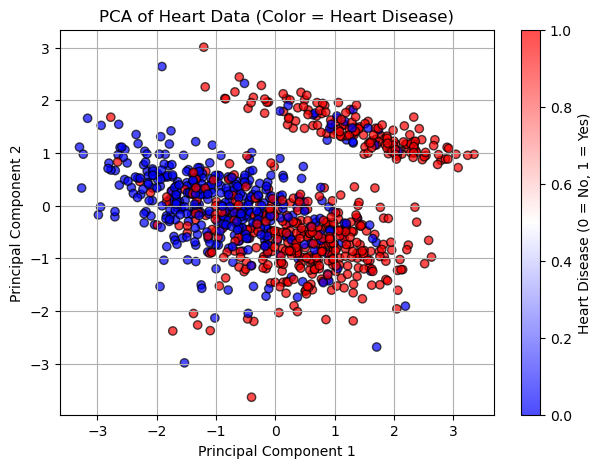

In [17]:
# Transform data to first two principal components
X_pca = pca.transform(X)
pca_df = pd.DataFrame(data=X_pca[:, :2], columns=['PC1', 'PC2'])

plt.figure(figsize=(7, 5))
scatter = plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=hearts['HeartDisease'],  # <-- replace with your actual label source
    cmap='bwr',
    alpha=0.7,
    edgecolor='k'
)

plt.title("PCA of Heart Data (Color = Heart Disease)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, label='Heart Disease (0 = No, 1 = Yes)')
plt.grid(True)
plt.show()

## Analyze Feature Contributions

In [6]:
# Create a DataFrame showing how each PC is composed of original features
pc_df = pd.DataFrame(
    data=pca.components_,
    columns=features,
    index=[f'PC{i+1}' for i in range(len(features))]
)
print("Principal Component Composition:")
pc_df

Principal Component Composition:


,Age,Oldpeak,MaxHR,ST_Slope,ExerciseAngina,Sex,ChestPainType,Cholesterol,FastingBS
PC1,0.499404,0.027159,-0.631651,-0.228309,0.179265,0.078708,-0.363919,-0.346240,0.089999
PC2,-0.253520,-0.028411,0.079872,0.076994,-0.118511,0.053409,0.293918,-0.901572,0.080595
PC3,-0.647884,-0.002680,-0.005725,-0.012008,0.095359,0.045094,-0.749844,-0.076205,-0.029344
PC4,-0.493061,-0.012567,-0.726467,-0.040206,0.037427,0.024259,0.422021,0.197158,-0.091647
PC5,0.128375,-0.092697,-0.242090,0.857226,-0.359163,-0.110601,-0.170054,-0.005700,-0.106304
PC6,0.058049,0.025084,0.089037,0.287668,0.651286,0.388995,0.080038,-0.071567,-0.564183
PC7,0.031475,0.012345,-0.008159,-0.222552,-0.087917,-0.685240,-0.036422,-0.130094,-0.673593
PC8,0.047691,-0.003997,-0.006385,-0.257484,-0.615599,0.595935,-0.064338,0.020165,-0.439003
PC9,0.018556,-0.994434,0.014400,-0.082273,0.058843,0.009415,-0.003972,0.011046,-0.009527
